# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales (CNN)
- Redes neuronales recurrentes (RNN)

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

## Introducción a las bibliotecas de aprendizaje profundo

Un *deep learning framework* es una interfaz, una biblioteca o una herramienta que nos permite construir modelos de aprendizaje profundo más fácil y rápidamente, sin entrar en los detalles de los algoritmos subyacentes. Proporcionan una forma clara y concisa de definir modelos utilizando una colección de componentes preconstruidos y optimizados.

En lugar de escribir cientos de líneas de código, se puede utilizar un framework adecuado que permita construir rápidamente un modelo de este tipo. A continuación se presentan algunas de las características clave de un buen framework de aprendizaje profundo:

- Optimizado para rendimiento.
- Fácil de entender y codificar.
- Buen apoyo de la comunidad.
- Paraleliza los procesos para reducir los cálculos.
- Computa automáticamente los gradientes.

### Keras: The Python Deep Learning library (https://keras.io/).

Hay muchos frameworks de machine learning ya establecidos, y nuevos frameworks están apareciendo frecuentemente para tratar nichos específicos.

Keras es framework y una API (un conjunto de funciones y procedimientos que permiten la creación de aplicaciones que acceden a las características o datos de un sistema operativo, aplicación u otro servicio) de redes neuronales de alto nivel, escrita en Python y capaz de correr sobre los frameworks de TensorFlow (Google), CNTK (ahora llamado Microsoft Cognitive Toolkit) o Theano (otro framework muy conocido es PyTorch de Facebook, pero no es soportado). Fue desarrollado con el objetivo de permitir una rápida experimentación. *Poder pasar de la idea al resultado en el menor tiempo posible es la clave para realizar una buena investigación. La creación de prototipos en keras es muy rápida y sencilla, además, es ligero en términos de construcción de modelos Deep Learning con muchas capas*.

- TensorFlow (DeepMind, Uber, AirBnB, Dropbox, ...) es bueno para proyectos avanzados, como la creación de redes neuronales multicapa. Se utiliza en el reconocimiento de voz/imagen y en aplicaciones basadas en texto (como Google Translate). Sin embargo, tiende a ser mas lento que CNTK. Es el framework mas recomendado para desarrollo actualmente debido en gran medida a su amplio uso, ecosistema y apoyo de la comunidad.

- CNTK facilita un entrenamiento realmente eficiente para el reconocimiento de voz, escritura a mano e imágenes. Ofrece un buen rendimiento y escalabilidad. Es muy eficiente en términos de uso de recursos, pero posee muy poco soporte. Se usa en Skype, Xbox y Cortana.

- Theano era un framework ampliamente utilizado para aprendizaje profundo desarrollado por el Instituto de Algoritmos de Aprendizaje de Montreal (MILA) en 2007, del cual TensorFlow extrajo muchas ideas. El desarrollo activo en el framework se ha detenido desde la versión 1.0. Es una referencia digna de mención, pero la comunidad se está alejando de él y no lo recomendaría para proyectos nuevos.

### Creación de modelos Keras con TensorFlow

Hay dos tipos principales de métodos en Keras para implementar arquitecturas de redes neuronales: el API Secuencial, y la clase Model usada con la API Funcional.
- El modelo secuencial es una pila lineal de capas, la red se construye capa por capa. Puede crear un modelo secuencial pasando una lista de instancias de capas al constructor. Es la forma más facil de crear un modelo, pero tambien la más limitada. Algunas arquitecturas que se pueden implementar son: LeNet, AlexNet o VGGNet. De esta forma **no** es posible hacer lo siguiente:
 - Compartir capas
 - Tener ramas (al menos no fácilmente)
 - Tener múltiples entradas
 - Tener múltiples salidas

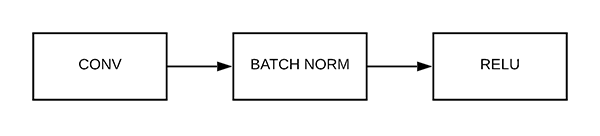

In [3]:
from IPython.display import Image
Image(filename=valid_path + 'prof_fig1.png')

- La API funcional de Keras es el camino a seguir para definir modelos complejos, tales como modelos de múltiples salidas, gráficos acíclicos dirigidos o modelos con capas compartidas.

### Red neuronal sencilla con aprendizaje supervizado (API secuencial)

Cuando se utiliza la API secuencial se construye paso a paso la arquitectura de la red utilizando las librerías específicas de capas, funciones de activación, modelos, etc. Lo normal es importar el siguiente conjunto de librerias al inicio del código:

In [4]:
# Importar paquetes necesarios
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate

Para nuestro ejemplo, en primer lugar, vamos a importar las librerías necesarias. Importaremos las librerías de numpy, Keras y unas librerías necesarias Scikit Learn.

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
#from keras.optimizers import SGD #ACTUALIZAR PATH
from tensorflow.keras.optimizers import SGD
import numpy as np

# Parejas de entrenamiento. x para entradas, y para salidas esperadas. Para la XOR igual que antes:
x = np.array([[-0.80, -0.85],
            [-0.91, 0.92],
            [0.87, -0.87],
            [0.96, 0.83],
            [-0.97, -0.93],
            [-0.82, 0.87],
            [0.93, -0.99],
            [0.80, 0.98],
            [-0.83, -0.94],
            [-0.84, 0.92],
            [0.89, -0.87]])
y = np.array([[-0.90], 
              [0.89], 
              [0.86], 
              [-0.89], 
              [-0.82], 
              [0.98], 
              [0.95], 
              [-0.93], 
              [-0.88], 
              [0.84], 
              [0.96]])

# Definimos el modelo de la red neuronal 2-6-10-10-1
model = Sequential() # El modelo secuencial es una pila lineal de capas.
model.add(Dense(6, input_dim=2, name="Input_layer")) # Capa regular densamente conectada, 6 neuronas
model.add(Dense(10, activation='tanh', name="Hidden_layer_2"))
model.add(Dense(10, activation='tanh', name="Hidden_layer_3"))
model.add(Dense(1, name="output"))

# Compilamos especificando la función de optimización
sgd = SGD(learning_rate=0.1) # Stochastic gradient descent optimizer
model.compile(loss='mean_absolute_error', optimizer=sgd) # loss: Nombre de la función de error

# Verificamos el resumen del modelo creado
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 6)                 18        
                                                                 
 Hidden_layer_2 (Dense)      (None, 10)                70        
                                                                 
 Hidden_layer_3 (Dense)      (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


Finalmente entrenamos el modelo:

In [12]:
model.fit(x, y, batch_size=32, epochs=20000, verbose=0)

El *batch_size* define el número de muestras o paquetes que se propagarán a través de la red durante el entrenamiento. Como se entrena la red usando menos muestras, el entrenamiento requiere menos memoria, y las redes se entrenan más rápido. Sin embargo, entre mas pequeño sea el lote, menos precisa será la estimación del gradiente.

In [13]:
evaluation = model.evaluate(x, y, batch_size=1, verbose=1)
evaluation # loss

11/11 [==============================] - 0s 2ms/step - loss: -0.0909


-0.09090906381607056

Miremos como predice las categorias:

In [14]:
print(x)
print(model.predict(x))

[[-0.8  -0.85]
 [-0.91  0.92]
 [ 0.87 -0.87]
 [ 0.96  0.83]
 [-0.97 -0.93]
 [-0.82  0.87]
 [ 0.93 -0.99]
 [ 0.8   0.98]
 [-0.83 -0.94]
 [-0.84  0.92]
 [ 0.89 -0.87]]
[[-1.5653805 ]
 [ 0.191173  ]
 [-0.17599626]
 [ 1.6005131 ]
 [-1.6265962 ]
 [ 0.2256893 ]
 [-0.24205764]
 [ 1.6019297 ]
 [-1.5992788 ]
 [ 0.25806898]
 [-0.15666571]]


## Taller

Evalue la red con diferentes funciones *loss* (error):
- mean_absolute_error
- mean_absolute_percentage_error
- mean_squared_logarithmic_error
- squared_hinge
- hinge
- categorical_hinge
- logcosh
- categorical_crossentropy
- sparse_categorical_crossentropy
- binary_crossentropy
- kullback_leibler_divergence
- poisson
- cosine_similarity

¿En qué consiste cada una de ellas?

    https://iq.opengenus.org/types-of-loss-function/
    https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/